In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':[8,8]}, font_scale=1.4)

In [2]:
df=pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115211 entries, 0 to 115210
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   lat          115211 non-null  float64
 1   lng          115211 non-null  float64
 2   desc         115211 non-null  object 
 3   zip          100789 non-null  float64
 4   title        115211 non-null  object 
 5   timeStamp    115211 non-null  object 
 6   twp          115177 non-null  object 
 7   addr         115211 non-null  object 
 8   e            115211 non-null  int64  
 9   Reason       115211 non-null  object 
 10  hour         115211 non-null  int64  
 11  month        115211 non-null  int64  
 12  day of week  115211 non-null  object 
 13  Year         115211 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 12.3+ MB


## Visualize the following columns  twp (the town), Reason, hour, month, day of week, and Year

### The Town

<AxesSubplot:xlabel='count', ylabel='twp'>

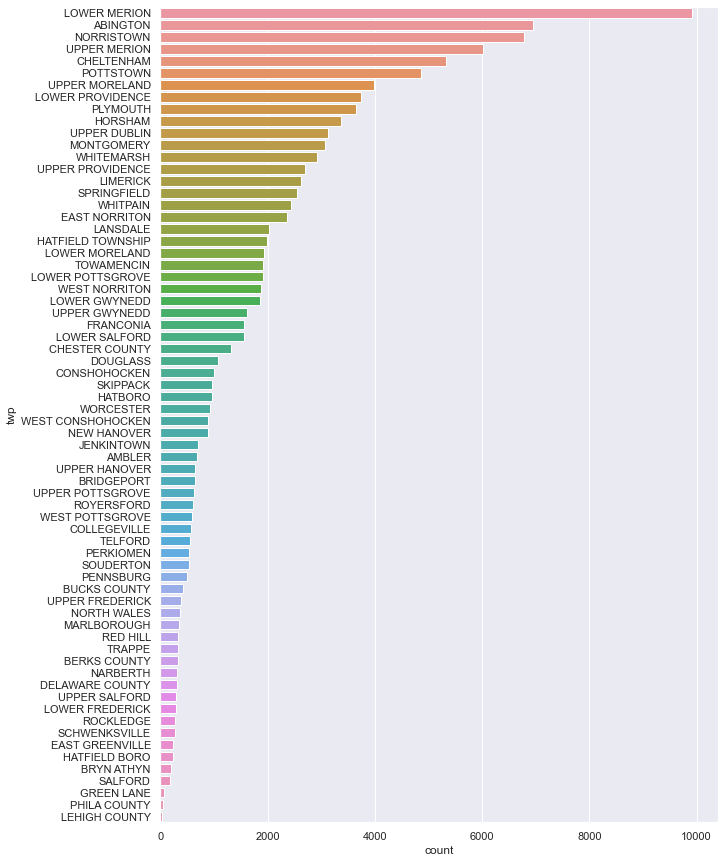

In [4]:
sns.set(rc={'figure.figsize':[10,15]})
sns.countplot(data=df, y=df['twp'], order = df['twp'].value_counts().index)

#### the above figure shows the reported count for all towns, there is 18 their reported more than 2000 call

<AxesSubplot:xlabel='count', ylabel='twp'>

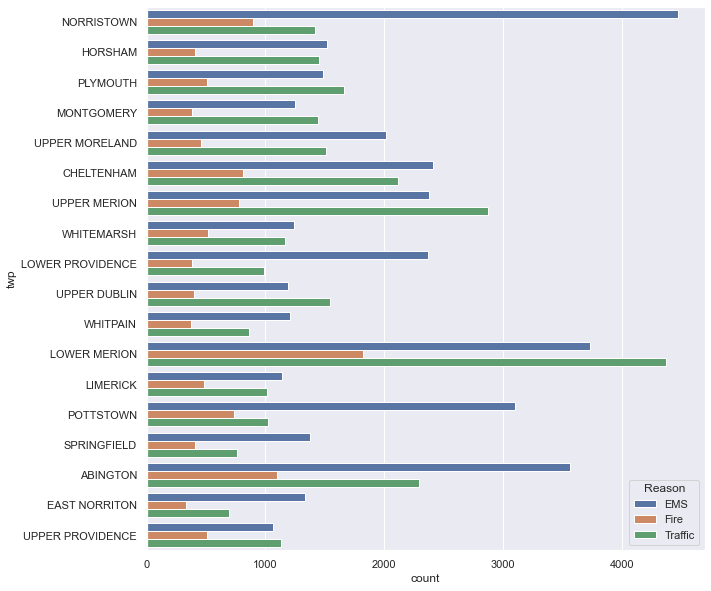

In [5]:
sns.set(rc={'figure.figsize':[10,10]})
sns.countplot(data=df, y=df[df['twp'].isin(df['twp'].value_counts().head(18).index)]['twp'], hue='Reason')

### When zoom in for towns above 2000 calls, you will find the following:
- The highest Emergency Medical Services (EMS) calls happend at Nooistown, Lowwer Merion, Abington and Pottstown
- The highest Traffic calls happend at Lower Merion, Upper Merion, Abington, and cheltenham. 
- The highest Fire calls happend at Lower Merion, and Abington
- Lower Merion, and Abington have highest call in EMS, Traffic and Fire calls

### Reporting time (the Hour)

<AxesSubplot:xlabel='hour', ylabel='count'>

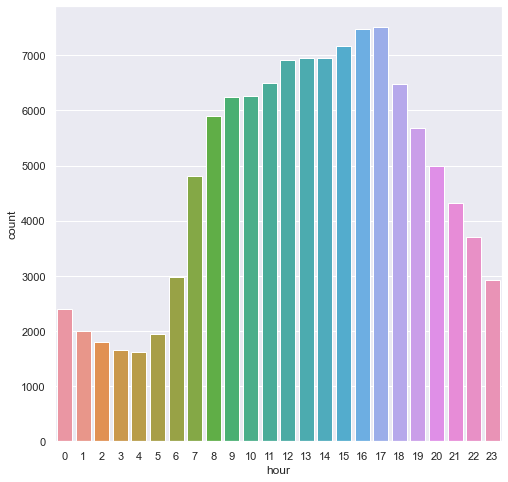

In [6]:
sns.set(rc={'figure.figsize':[8,8]})
sns.countplot(data=df, x=df['hour'])

#### The above figure shows that calls jumps from 6am to almost the duble at 8am and keep increasing till reach the peak at 4&5 pm, then it start decreasing till the lowest rate between 3&4 am

### The Day of the week

<AxesSubplot:xlabel='day of week', ylabel='count'>

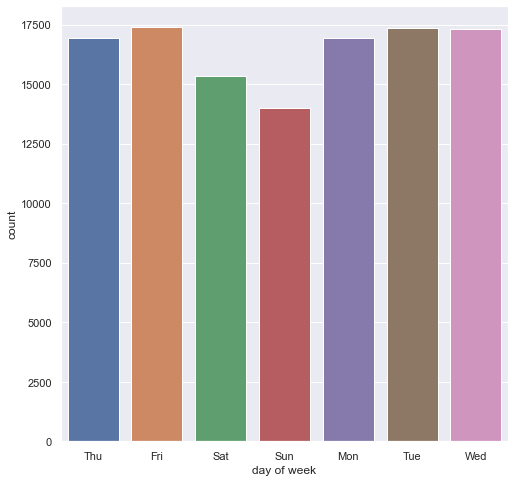

In [7]:
sns.countplot(data=df, x=df['day of week'])

#### Sunday and Saturday repesent the lowest calls, but not much differernce from rest of week days. The distribution look uniform among week days.

### The Month and Year

<AxesSubplot:xlabel='month', ylabel='count'>

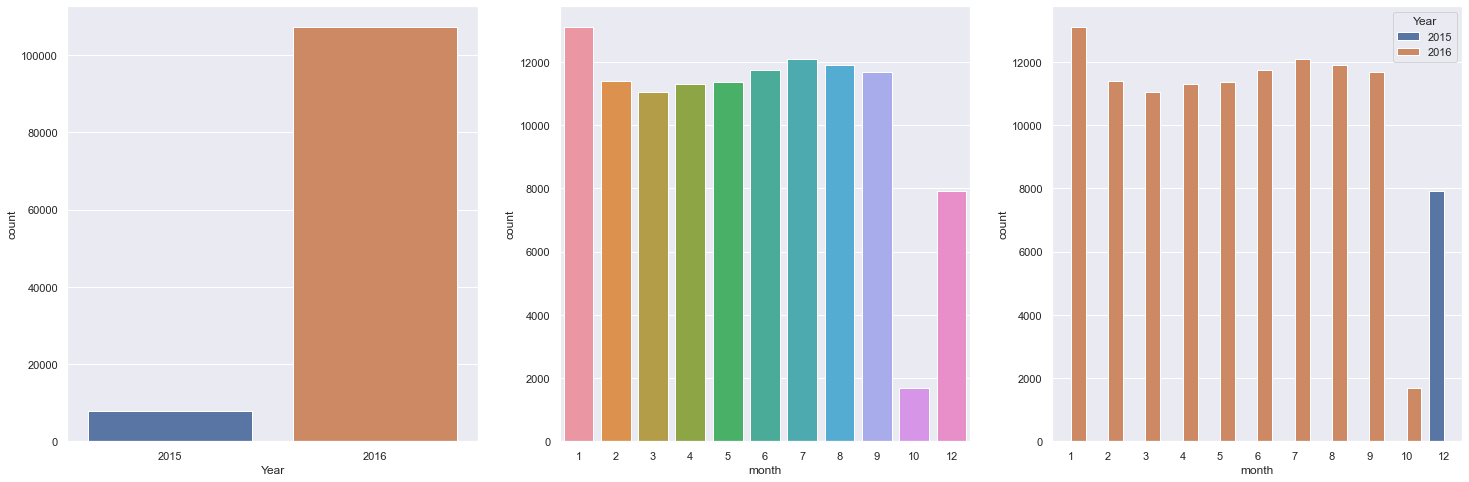

In [8]:
fig, axes=plt.subplots (1,3, figsize=(25,8), sharey=False)
sns.countplot(ax=axes[0],data=df, x=df['Year'])
sns.countplot(ax=axes[1],data=df, x=df['month'])
sns.countplot(ax=axes[2],data=df, x=df['month'], hue='Year')

#### The calls distribution looks unifrom among months from Jan 2016 till Sep 2017, I belive that data for Dec 2015 and Oct 2016 are not complete and doesn't represent all calls receive during these two months, they are start and end or data recording.

### The Reason

<AxesSubplot:xlabel='Reason', ylabel='count'>

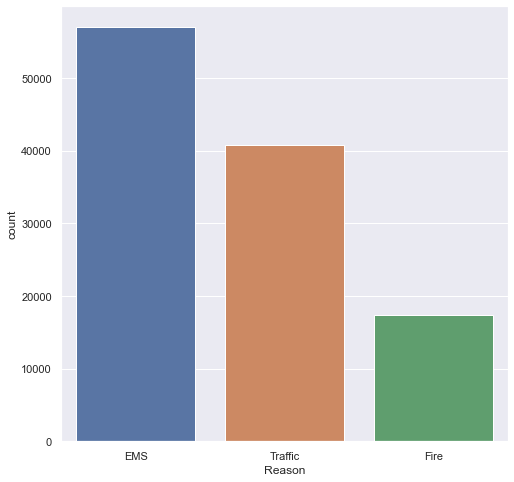

In [9]:
sns.countplot(data=df, x=df['Reason'], order = df['Reason'].value_counts().index)

#### The majorty of calls are EMS and Traffic, will zoon in for each in the following sections

### The Reason: Emergency Medical Services (EMS)

<AxesSubplot:xlabel='month', ylabel='count'>

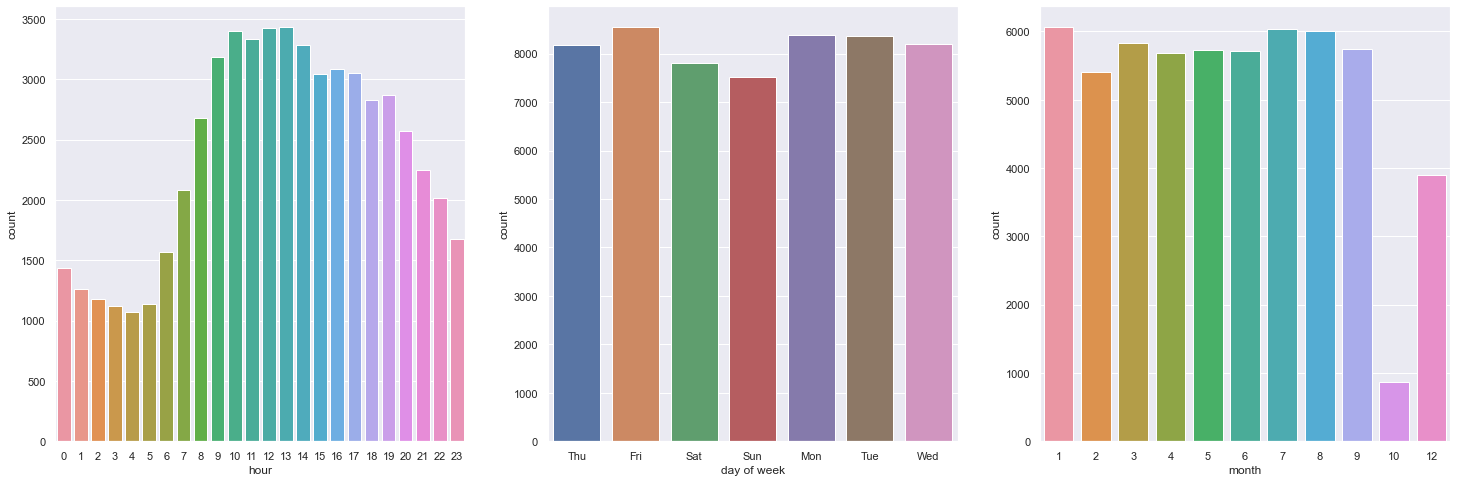

In [10]:
dfems=df[df['Reason']=='EMS']
fig, axes=plt.subplots (1,3, figsize=(25,8), sharey=False)
sns.countplot(ax=axes[0],data=df, x=dfems['hour'])
sns.countplot(ax=axes[1],data=df, x=dfems['day of week'])
sns.countplot(ax=axes[2],data=df, x=dfems['month'])

#### The reporting hours peak is from 9am till 2pm; and the day of the week and month has uniform distribution. 

### The Reason: Traffic

<AxesSubplot:xlabel='month', ylabel='count'>

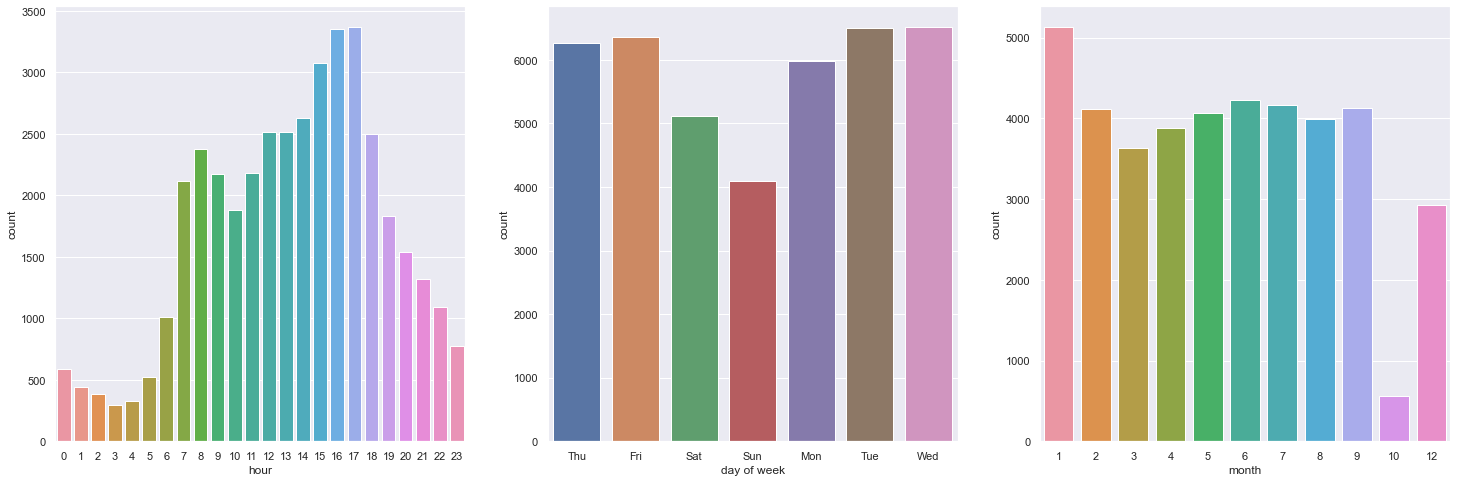

In [11]:
dftrffic=df[df['Reason']=='Traffic']
fig, axes=plt.subplots (1,3, figsize=(25,8), sharey=False)
sns.countplot(ax=axes[0],data=df, x=dftrffic['hour'])
sns.countplot(ax=axes[1],data=df, x=dftrffic['day of week'])
sns.countplot(ax=axes[2],data=df, x=dftrffic['month'])

#### The reporting hours peak is from 3pm till 5pm; and the day of the week is lower at weekend, this make since as this when majority of peaple commute. The month has uniform distribution. 

### The Reason: Fire

<AxesSubplot:xlabel='month', ylabel='count'>

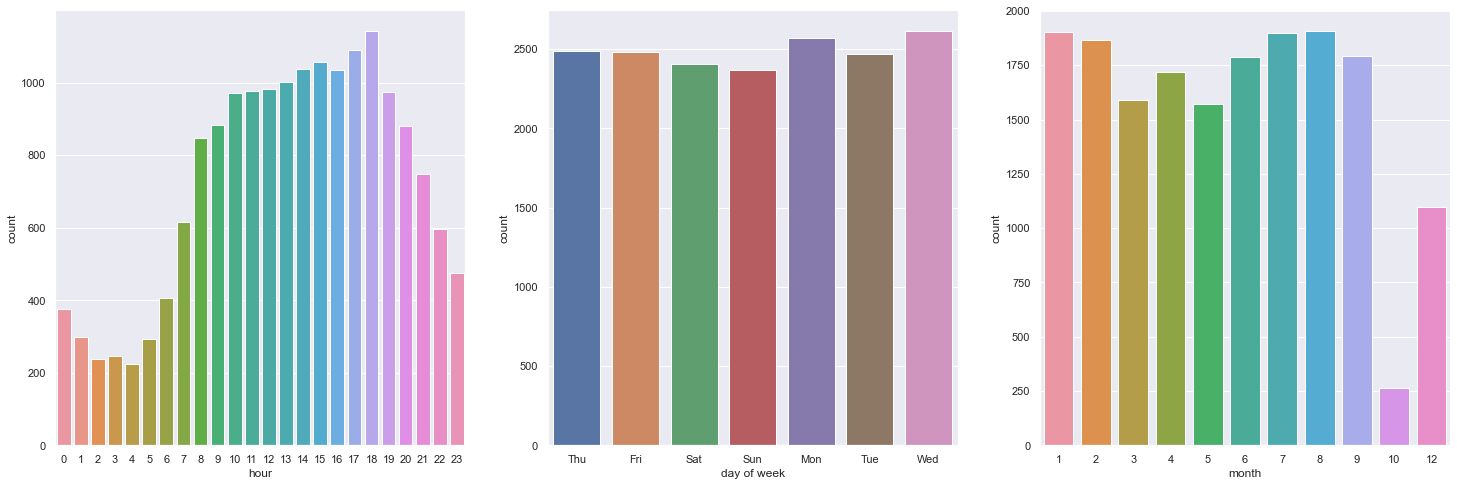

In [12]:
dffire=df[df['Reason']=='Fire']
fig, axes=plt.subplots (1,3, figsize=(25,8), sharey=False)
sns.countplot(ax=axes[0],data=df, x=dffire['hour'])
sns.countplot(ax=axes[1],data=df, x=dffire['day of week'])
sns.countplot(ax=axes[2],data=df, x=dffire['month'])

#### The Fire reason has same observation for hour, day of the week and month visualization listed abover.